# Linear Regression Assignment - BoomBikes

### Introduction:
###### This notebook is to Build a multiple linear regression model for the prediction of demand for shared bikes.

###### A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

### Problem Statement:
######  A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know: .Which variables are significant in predicting the demand for shared bikes. .How well those variables describe the bike demands. Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

### Business Goal:
###### We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

# Importing Numpy and Pandas libraries
import numpy as np
import pandas as pd

# Importing required libraries for visualization.
import matplotlib.pyplot as plt
import seaborn as sns
# import for statistical functions
import scipy.stats as stats
import scipy as sp
# import stats model for qq plot
import statsmodels.api as sm
import statsmodels.tsa.api as smt

# Import To Suppress ( Ignore ) Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
bikesdata = pd.read_csv('day.csv')
bikesdata.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bikesdata.shape

(730, 16)

In [5]:
bikesdata.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Inference
#### From datase and data dictionary
#### In dataset instant is an index column so it's not providing any information, dropping it
#### Casual and registered columns together gives cnt column, and we are not getting much information from these two columns, #### thus droppng these two.
#### dteday is date column and we already have mnth and yr columns mentions in dataframe, So we can drop dteday column as it's not providing any extra information.
#### There are no missing values from sharing_data.info()
#### Target variable/column is cnt. Which will be use for Prediction purpose

In [6]:
# Checking datatypes for each columns in dataset
bikesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Insight:
#### Boom Bikes Data Frame doesn't contain any of the miss-allignment/missing data columns.
#### Out of 16 columns of Boom Bikes Data Frame, 'dteday' column is an object datatype and rest all are numeric datatype.

In [7]:
# Checking for null/missing values in the dataset

bikesdata.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleanup unnecessary columns
### Exploratory Data Analysis

In [8]:
# Check all the values in yr column to see if it can be dropped
bikesdata.yr.unique()

array([0, 1], dtype=int64)

### Inference
- Checking the dataset, we can clearly see that there are no Missing/Null value

In [9]:
# Checking all the columns name

bikesdata.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# instant is unique for each row
print(len(bikesdata.instant.unique()))

# dteday is unique for each row
print(len(bikesdata.dteday.unique()))

730
730


In [11]:
# Drop instant and dteday columns since they are all unique values
bikesdata.drop(['instant', 'dteday'], axis = 1, inplace=True)

# Drop registered and casual columns since we are only interested in cnt and not casual, registered (casual + registered = cnt)
bikesdata.drop(['casual', 'registered'], axis=1,inplace=True)

In [12]:
bikesdata.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# # Renaming some column names for better understanding of data

bikesdata.rename(columns = {'yr':'year','mnth':'month', 'weathersit':'weather', 'atemp':'realfeeltemp', 'hum':'humidity','cnt':'count'}, inplace = True) 
bikesdata.head()

,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Derived Column
##### season : season (1:Spring, 2:Summer, 3:Fall, 4:Winter)
##### month : 1:January, 2:February, 3:March..........,12:December
##### weather :
##### 1: Clear, Few clouds, Partly cloudy, Partly cloudy = Clear
##### 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Mist + Cloudy
##### 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds = Light Snow
##### 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Heavy Rain + Ice Pallets
##### weekday : 0:Sunday, 1:Monday, 2:Tuesday, 3:Wednesday, 4:Thursday, 5:Friday, and 6:Saturday

In [14]:
# Mapping categorical variables referring to the data dictionary for better understanding of data

bikesdata['season'] = bikesdata.season.map({1: 'spring', 2: 'summer', 3:'fall', 4:'winter'})
bikesdata['month'] = bikesdata.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bikesdata['weather'] = bikesdata.weather.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist'})
bikesdata['weekday'] = bikesdata.weekday.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'})

bikesdata.head()

,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Checking Outliers for outliers treatment

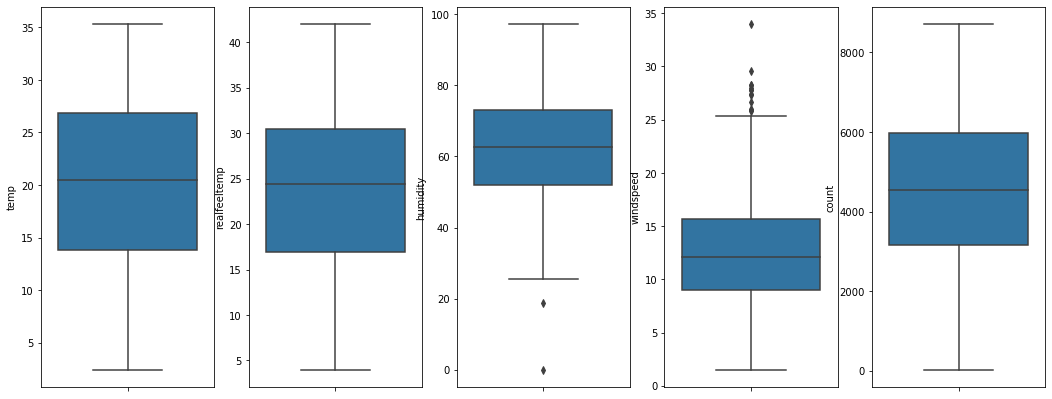

In [15]:
# Analysing Categorical variable to see Sharing demand through box plot

plt.figure(figsize=(18, 7))
plt.subplot(1,5,1)
sns.boxplot(  y = 'temp', data = bikesdata)
plt.subplot(1,5,2)
sns.boxplot( y = 'realfeeltemp', data = bikesdata)
plt.subplot(1,5,3)
sns.boxplot(y = 'humidity', data = bikesdata)
plt.subplot(1,5,4)
sns.boxplot(y = 'windspeed', data = bikesdata)
plt.subplot(1,5,5)
sns.boxplot(y = 'count', data = bikesdata)

plt.show()

#### we can see that there outliers in windspeed column, let's handle outliers present in windspeed

In [16]:
# checking  mean, median and quartile data for windspeed column

bikesdata.windspeed.describe()

count    730.000000
mean      12.763620
std        5.195841
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       34.000021
Name: windspeed, dtype: float64

In [17]:
# Getting the lower and upper bound using IQR method.
# IQR = Interquartile Range (q3-q1)

q1 = bikesdata.windspeed.describe()["25%"]
q3 = bikesdata.windspeed.describe()["75%"]
iqr = q3-q1
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

In [18]:
# Treatment of outliers

#Capping
bikesdata.windspeed=np.where(bikesdata.windspeed>upper_bound,upper_bound,bikesdata.windspeed)

#Flooring
bikesdata.windspeed=np.where(bikesdata.windspeed<lower_bound,lower_bound,bikesdata.windspeed)

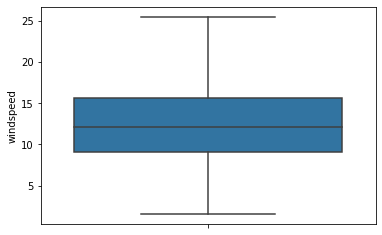

In [19]:
# plotting box plot after handling outliers.
sns.boxplot(y='windspeed', data=bikesdata)
plt.show()

#### as there is no outliers in windspeed , outliers succesfully handleded

### Data Visualisation
- Target Variable is Count


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

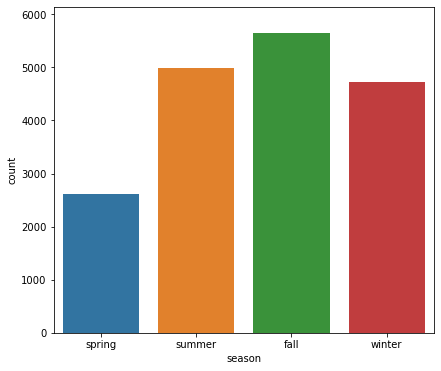

In [20]:
# Visualising season wise effect on rented bikes demand

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.barplot(x='season', y='count', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Season Wise Rented Bikes demand')
plt.xlabel('Season name')
plt.ylabel('no. of Bike Rented')

plt.subplot(1,2,2)
ax = sns.barplot(x='season', y='count', hue='month', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Season Wise Rented Bikes demand')
plt.xlabel('Season name')
plt.ylabel('no. of Bike Rented')
plt.show()

### Inference : 
- Fall Season have Highest demand among all season followed by Summer and Winter Season
- Spring Season have least demand, we can say that in spring season least people using rented bike.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

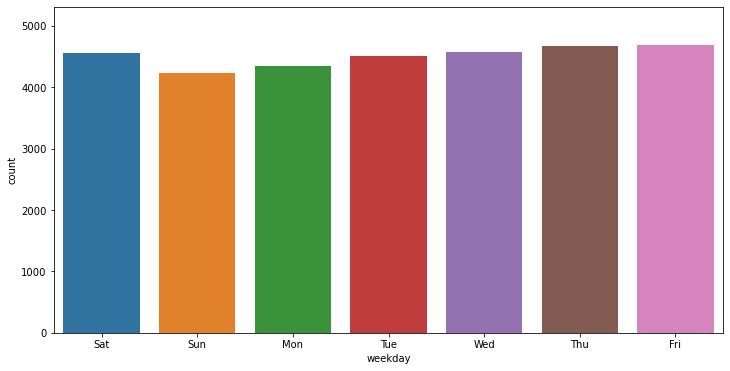

In [21]:
# Visualising Week wise effect on rented bikes demand

plt.figure(figsize=(12,6))
ax = sns.barplot(x='weekday', y='count', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('week Wise Rented Bikes demand')
plt.xlabel('weekday')
plt.ylabel('no. of Bike Rented')
plt.xticks(rotation=45)
plt.show()

### Inference : 
- here it can be observe that rented bike demand has been increased in year 1: '2019' compared to year 0: '2018'.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

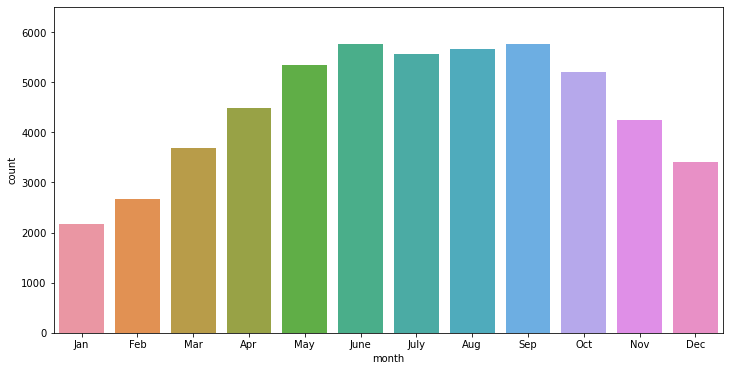

In [22]:
# Visualising month wise effect on rented bikes count

plt.figure(figsize=(12,6))
ax = sns.barplot(x='month', y='count', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Monthly Rented Bikes demand')
plt.xlabel('Month')
plt.ylabel('no. of Bike Rented')
plt.show()

### Inference : 
- almost similar demand of rented bikes in June, September, August, July Month Followed by May, Oct Month.
-  they Should be prepare for bike rent supply according to demand.
- December, February, January have the least demand may be due to Winter season.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

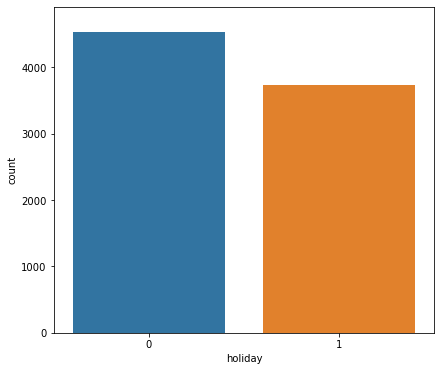

In [23]:
# Visualising holidays effect on rented bikes demand

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.barplot(x='holiday', y='count', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Holidays effects on Rented Bikes demand')
plt.xlabel('Holiday')
plt.ylabel('no. of Bike Rented')

plt.subplot(1,2,2)
ax = sns.barplot(x='holiday', y='count',hue='workingday', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Holidays effects on Rented Bikes demand')
plt.xlabel('Holiday')
plt.ylabel('no. of Bike Rented')
plt.show()

### Inference : 
- Demand Decreases as on Holidays , it may be due to people Spending there holiday with family.
- or it could be also conclude that may be on non holiday people taking bike rent for their work more than the holiday.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

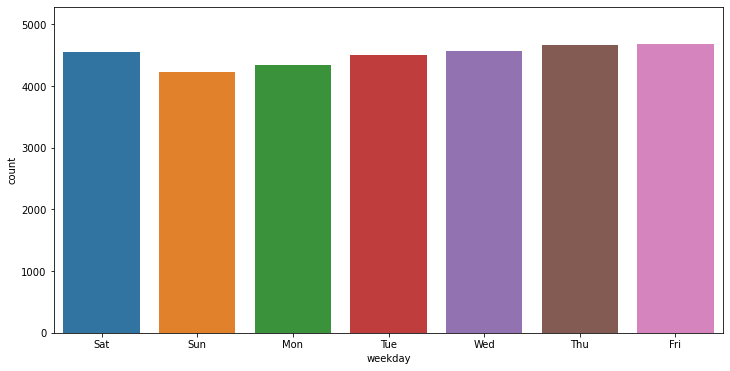

In [24]:
# Visualising Week wise effect on rented bikes demand

plt.figure(figsize=(12,6))
ax = sns.barplot(x='weekday', y='count', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('week Wise Rented Bikes demand')
plt.xlabel('weekday')
plt.ylabel('no. of Bike Rented')
plt.xticks(rotation=45)
plt.show()

### inference : 
- its looks like all weekday (all day from Sunday to Saturday) have similar bike demands.
- but it is lowest at the start of the week.
- people on Sunday (holiday) less prefer for rented bike.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

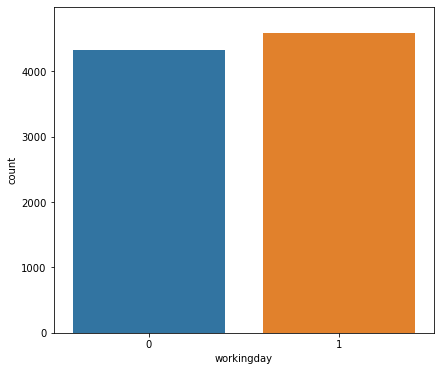

In [25]:
# Visualising workingday wise effect on rented bikes demand

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.barplot(x='workingday', y='count', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('working day effects on Rented Bikes demand')
plt.xlabel('Working Day')
plt.ylabel('no. of Bike Rented')

plt.subplot(1,2,2)
ax = sns.barplot(x='workingday', y='count',hue='holiday', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('working day effects on Rented Bikes demand')
plt.xlabel('Working Day')
plt.ylabel('no. of Bike Rented')
plt.show()

#### Inference :
#### looks like similar demand during working day and non working day, but still working day have more demand.

AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

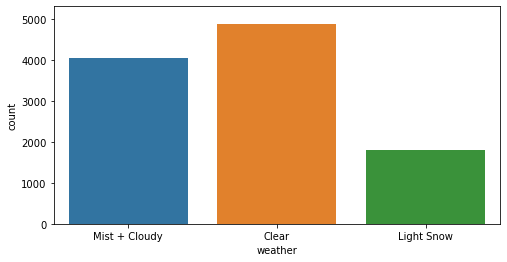

In [26]:
# Visualising weather wise effect on rented bikes demand

plt.figure(figsize=(8,4))
ax = sns.barplot(x='weather', y='count', data=bikesdata, errwidth=0)
ax.bar_label(ax.containers[0])
plt.title('Weather effect on Rented Bikes demand')
plt.xlabel('Weather Condition')
plt.ylabel('no. of Bike Rented')
plt.xticks(rotation=45)
plt.show()

### Inference : 
- it can be observe that if Weather Condition will be Clear, the Deamand will more.
- if the Weather Condition will Light Snow Demand will drop.
- Bike Renting Comapny should take care of Weather forecast to fullfill the demand

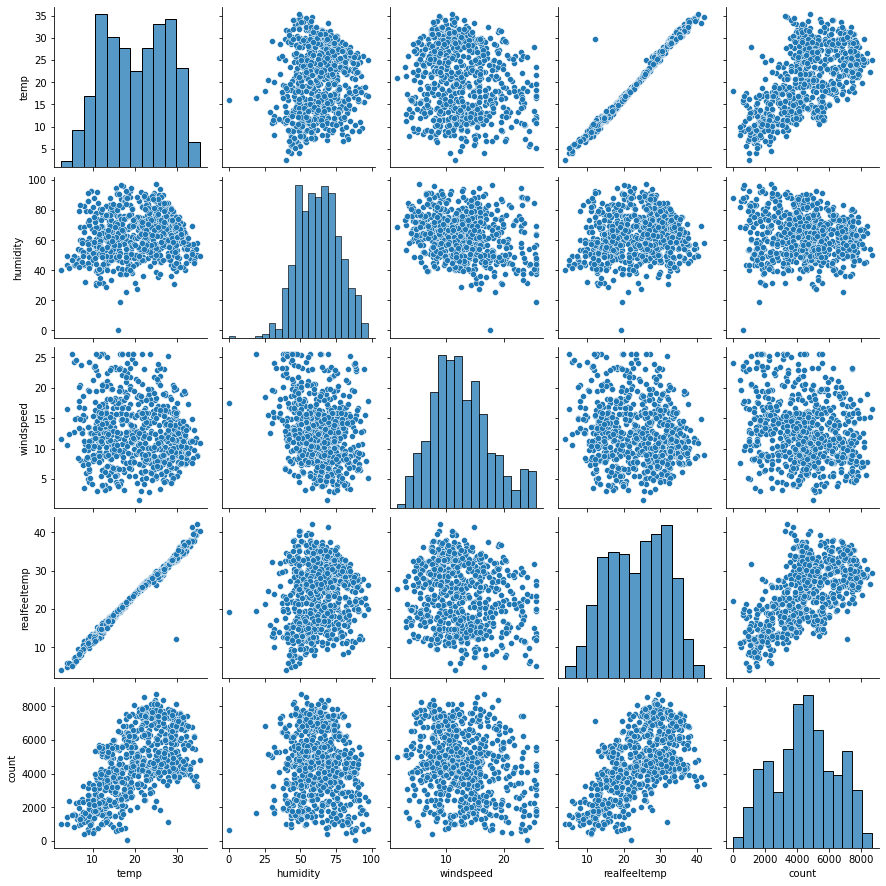

In [27]:
# Visualise pairplot for numerical variables
sns.pairplot(bikesdata, vars=["temp", "humidity", "windspeed", "realfeeltemp", "count"])
plt.show()

### Inference : -
- From pair plot we can clearly conclude that there is some linear relation between "temp" , "realfeeltemp" with "count"
- its shows we can go for linear regression for solving the problem. #### Independent variable which could be good predictor - - - from EDA : temp, weather, months, season, and workingday

<Figure size 1440x1080 with 0 Axes>

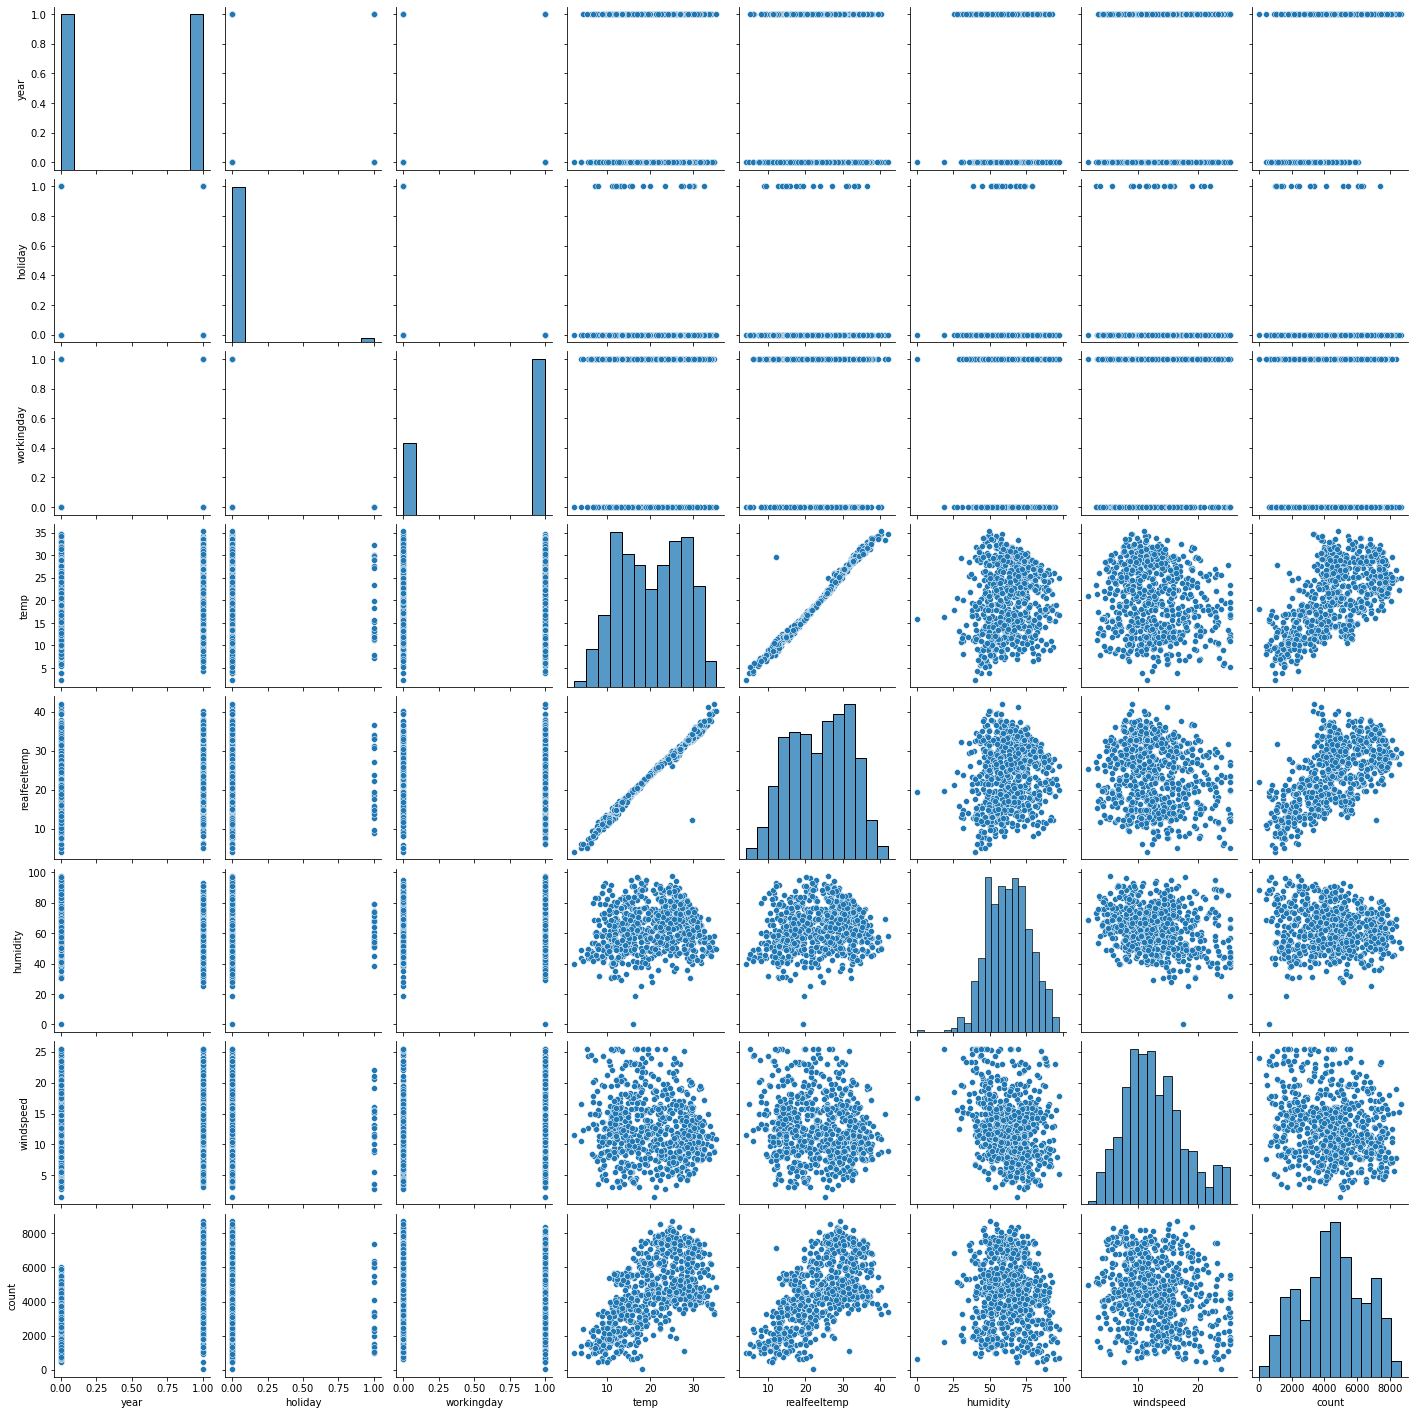

In [28]:
plt.figure(figsize=(20,15))
sns.pairplot(bikesdata)
plt.show()

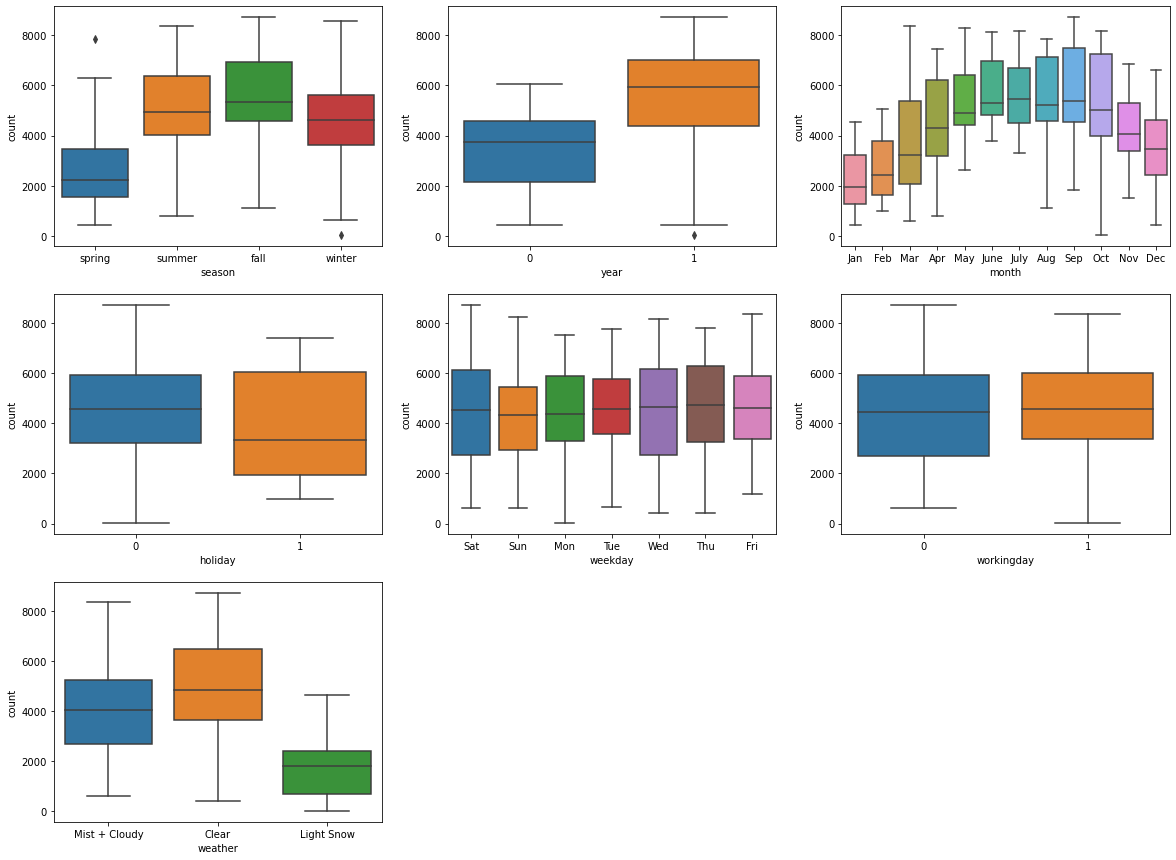

In [29]:
# Analysing Categorical variable to see Sharing demand through box plot

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bikesdata)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = bikesdata)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = bikesdata)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'count', data = bikesdata)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'count', data = bikesdata)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'count', data = bikesdata)
plt.subplot(3,3,7)
sns.boxplot(x = 'weather', y = 'count', data = bikesdata)
plt.show()

### Inference:
1. fall season (season 3) has Highest demand for rental bikes while, spring season has lowest.
2. its observed that demand for next year (from 2018 to 2019) has increased.
3. Bike Sharing Demand is continuously increasing from january to june, while September month has highest demand among all. after september demand start decreasing.
4. whenever there is holiday started demand has been decreased.
5. weekday has almost same demand. its not much concluding demand during weekday.
6. its looks like similar demand during working day and non working day, but still working day have more demand.
7. During september month Bike sharing demand is more. while during year begning and end its less demand. it could be due to Extreme weather conditions.

#### Regression plot For check linearity

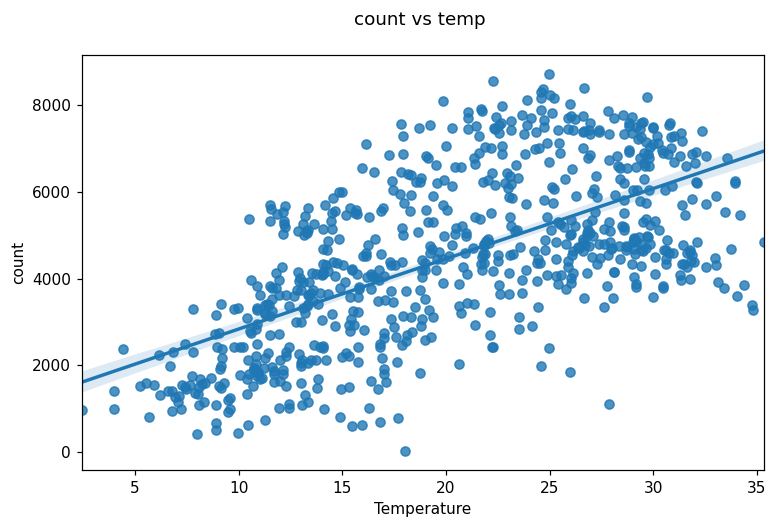

In [30]:
# regression plot count vs temp

plt.figure(figsize=(8,5),dpi=110)
plt.title("count vs temp \n")
sns.regplot(y="count", x="temp", data = bikesdata)
plt.xlabel("Temperature")
plt.show()

### Inference :
- Demand for bikes is positively correlated with temp.
- Here We can say that count is linearly increasing with temp indicating linear relation.

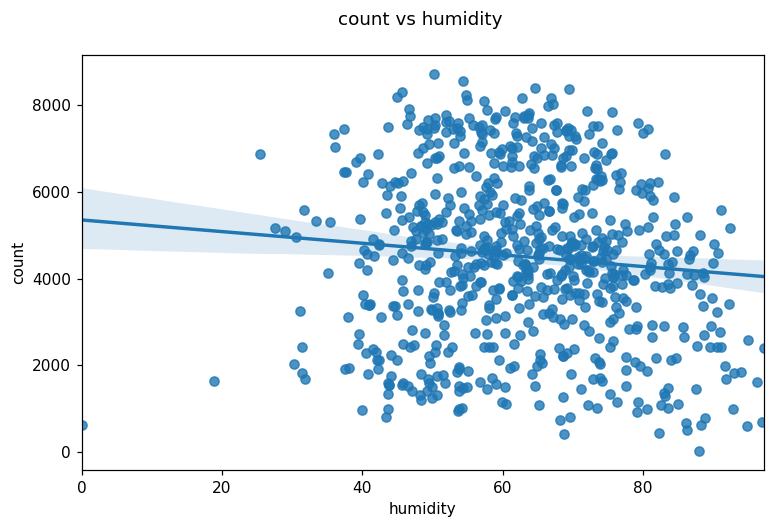

In [31]:
# regression plot count vs humadity

plt.figure(figsize=(8,5),dpi=110)
plt.title("count vs humidity \n")
sns.regplot(y="count", x="humidity", data = bikesdata)
plt.xlabel("humidity")
plt.show()

### Inference :
- Here humidity are more scattered around.
- Also count is decreasing with increase in humidity.

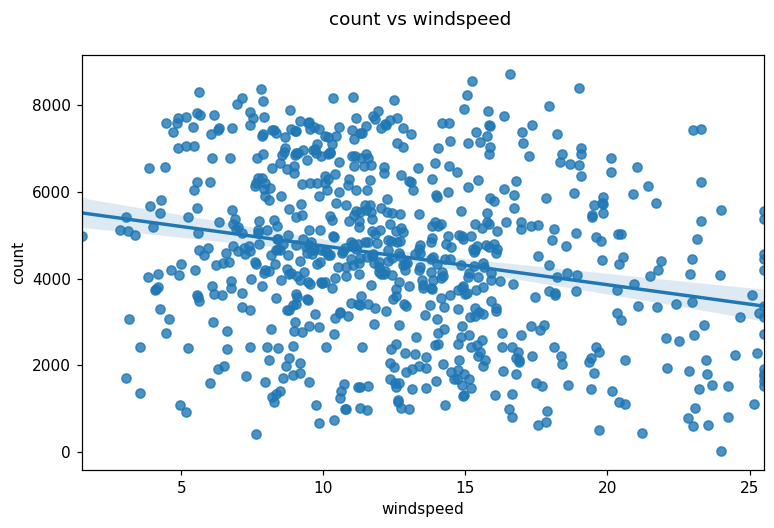

In [32]:
# regression plot count vs windspeed

plt.figure(figsize=(8,5),dpi=110)
plt.title("count vs windspeed \n")
sns.regplot(y="count", x="windspeed", data = bikesdata)
plt.xlabel("windspeed")
plt.show()

### Inference :
- windspeed are more scattered around.
- Also count is decreasing with increase in windspeed.

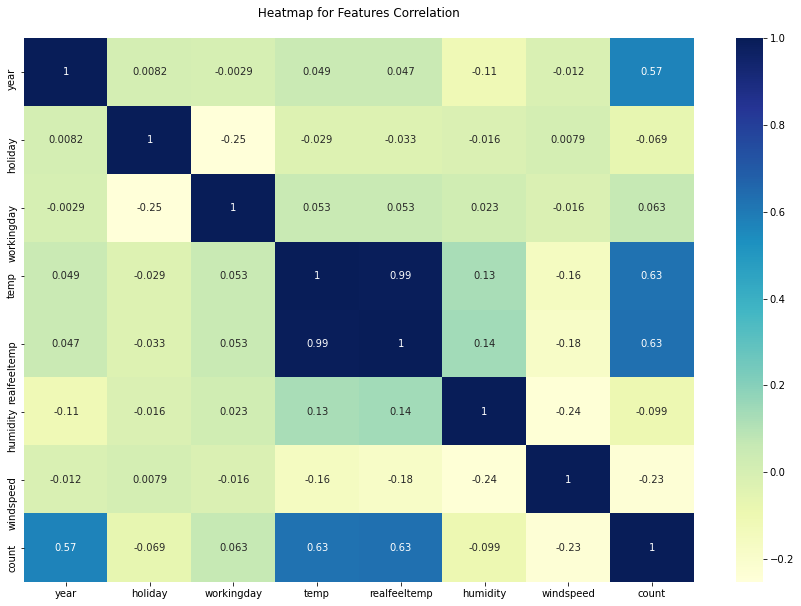

In [33]:
# Heatmap to check correlation between variables

plt.figure(figsize=(15, 10))
sns.heatmap(bikesdata.corr(), annot = True, cmap='YlGnBu')
plt.title(" Heatmap for Features Correlation \n")
plt.show()

### Inference :-
- temp is highly correlated with realfeeltemp.

### Step 2 : Data Prepration

### Data Prepration for Linear Regression

In [34]:
bikesdata.head()

,season,year,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables
####  Creating dummy Variables for months, weekdays, weathers and seasons.

In [35]:
# Creating dummy variables for months, weekdays, weathers andseasons

months_dummy = pd.get_dummies(bikesdata.month, drop_first = True)
seasons_dummy = pd.get_dummies(bikesdata.season, drop_first = True)
weekdays_dummy = pd.get_dummies(bikesdata.weekday, drop_first = True)
weathers_dummy = pd.get_dummies(bikesdata.weather, drop_first = True)

In [36]:
# Adding these dummy variables datasets to the original dataset using concat

bikesdata = pd.concat([months_dummy, weekdays_dummy, weathers_dummy, seasons_dummy, bikesdata], axis = 1)

bikesdata.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,month,holiday,weekday,workingday,weather,temp,realfeeltemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
# Dropping 'season', 'month', 'weekday', 'weather' as we have already created a dummy variables for each of them

bikesdata.drop(['month', 'season', 'weekday', 'weather'], axis = 1, inplace = True)

bikesdata.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,summer,winter,year,holiday,workingday,temp,realfeeltemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [38]:
bikesdata.shape

(730, 30)

In [39]:
# checking converted datatypes

bikesdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Aug            730 non-null    uint8  
 1   Dec            730 non-null    uint8  
 2   Feb            730 non-null    uint8  
 3   Jan            730 non-null    uint8  
 4   July           730 non-null    uint8  
 5   June           730 non-null    uint8  
 6   Mar            730 non-null    uint8  
 7   May            730 non-null    uint8  
 8   Nov            730 non-null    uint8  
 9   Oct            730 non-null    uint8  
 10  Sep            730 non-null    uint8  
 11  Mon            730 non-null    uint8  
 12  Sat            730 non-null    uint8  
 13  Sun            730 non-null    uint8  
 14  Thu            730 non-null    uint8  
 15  Tue            730 non-null    uint8  
 16  Wed            730 non-null    uint8  
 17  Light Snow     730 non-null    uint8  
 18  Mist + Clo

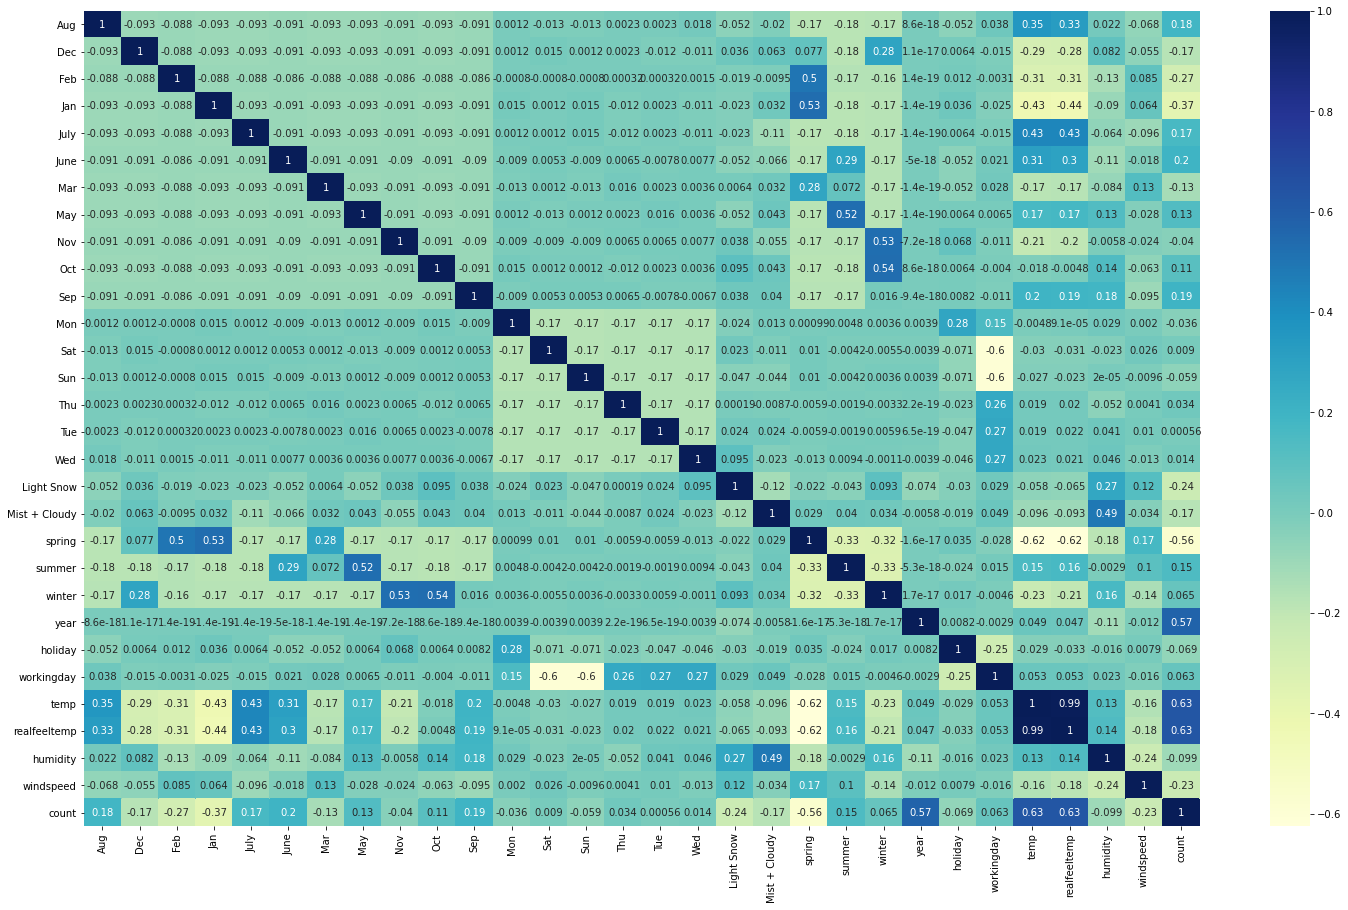

In [40]:
# Heatmap to check correlation between variables

plt.figure(figsize=(25, 15))
sns.heatmap(bikesdata.corr(), annot = True, cmap='YlGnBu')
plt.show()

#### Inference
- From Heatmap it's clear that variables 'temp' and 'realfeeltemp' are strongly correlated. Hence dropping column 'realfeeltemp

In [41]:
#  From Heatmap it's clear that variables 'temp' and 'realfeeltemp' are strongly correlated. Hence dropping column 'realfeeltemp'

bikesdata.drop(['realfeeltemp'], axis = 1, inplace = True)
bikesdata.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.110847,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,14.902598,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.050924,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,8.200000,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,9.305237,43.6957,12.522300,1600


### Building the model into training and testing sets

In [42]:
# importing sklearn library for regression model building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

## Splitting the Data in to Trainnig set and Testing set


In [43]:
# spliting data in to training set and testing set in to 70:30 ratio

df_train, df_test = train_test_split(bikesdata, train_size = 0.7, random_state = 100)

In [44]:
df_train.shape

(510, 29)

In [45]:
df_test.shape

(220, 29)

### Rescaling the features by minmax scaller

In [46]:
# here for MinMax scaller using sklearn library, library imported in libraries list
# defining a variable scaler for MinMax scalling

scaler = MinMaxScaler()

# Applying scaler() to all the numerical colums in training data
# #creating a list of numeric variables

num_vars = ['temp', 'humidity', 'windspeed', 'count']

# Fiting it on data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0.815169,0.725633,0.363923,0.827658
426,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0.442393,0.640189,0.351077,0.465255
728,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0.245101,0.498067,0.911723,0.204096
482,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0.395666,0.504508,0.259139,0.482973
111,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0.345824,0.751824,0.523822,0.191095


In [47]:
df_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.438893,0.513499
std,0.225858,0.145846,0.226881,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.273856,0.356420
50%,0.542596,0.653714,0.408027,0.518638
75%,0.735215,0.754830,0.569834,0.684710
max,1.000000,1.000000,1.000000,1.000000


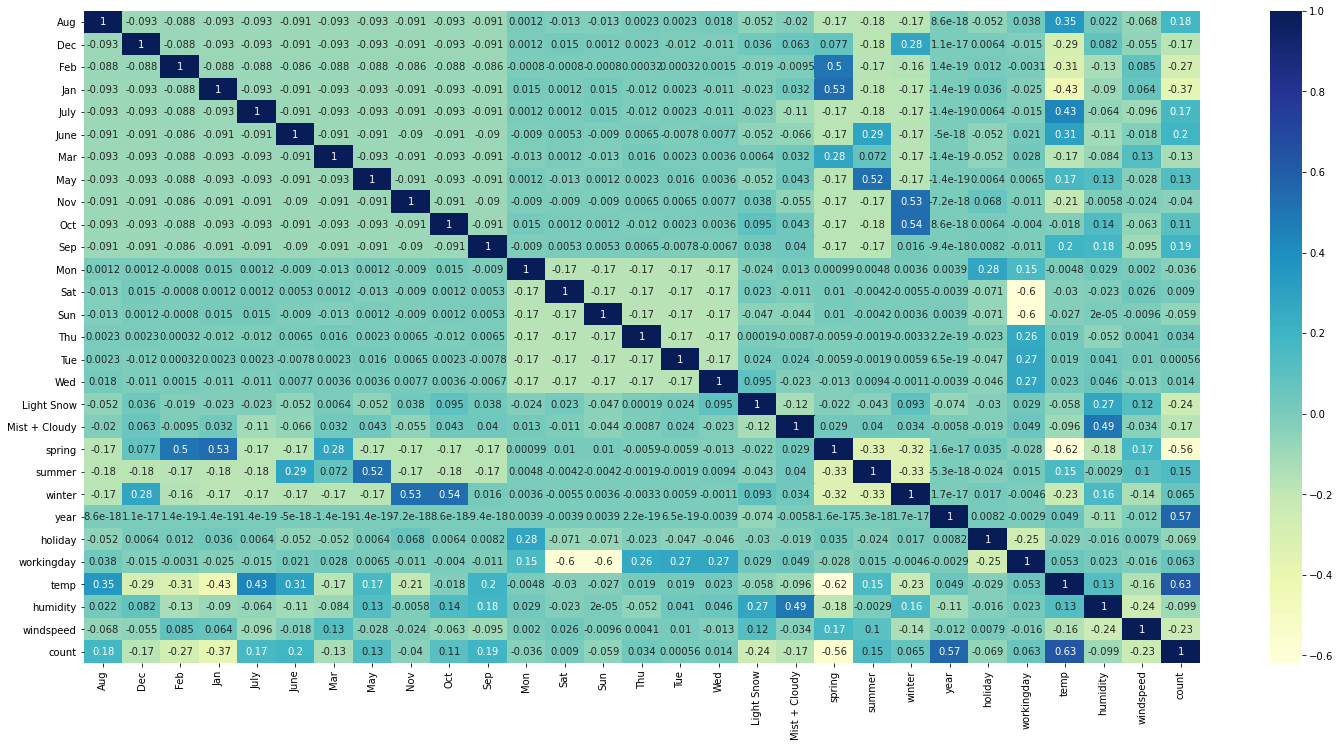

In [48]:
# Heatmap to check correlation between variables

plt.figure(figsize=(25, 12))
sns.heatmap(bikesdata.corr(), annot = True, cmap='YlGnBu')
plt.show()

### Step 3:Training the Model
### Building linear regression model
### Building Model using RFE and Automated approach
- Here using RFE model to eliminate some columns

#### Assumptions :
- Linear relationship between x and y.
- Error terms are normally distributed (not x,y).
- Error terms are independent of each other.
- Error terms have contant Variance.

In [49]:
# Dividing the tarining dataset into features and target variable

y_train = df_train.pop('count')
X_train = df_train

In [50]:
# Importing sklearn library for RFE and LinearRegression

#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [51]:
# Creating a Lienar Regression model using SKLearn for RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [52]:
# using RFE for feature selection , Limiting number of feature selection to 15 features.

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [53]:
# creating list of Columns selected by RFE and their weights
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 5),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', False, 4),
 ('Thu', False, 11),
 ('Tue', False, 12),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [54]:
# listing features which are selected by RFE during selection
X_train.columns[rfe.support_]

Index(['Jan', 'July', 'Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'spring',
       'summer', 'winter', 'year', 'holiday', 'workingday', 'temp', 'humidity',
       'windspeed'],
      dtype='object')

In [55]:
# listing features which are not selected by RFE during selection
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sun',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

#### Building model using statsmodel, for the detailed analysis
### Building the Model
- Model 1 - starting with all variables selected by RFE
### RFE MODEL : 1

In [56]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [57]:
# Adding a constant variable

import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

X_train_rfe.head()

,const,Jan,July,Sep,Sat,Light Snow,Mist + Cloudy,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed
576,1.0,0,1,0,0,0,0,0,0,0,1,0,1,0.815169,0.725633,0.363923
426,1.0,0,0,0,1,0,1,1,0,0,1,0,0,0.442393,0.640189,0.351077
728,1.0,0,0,0,0,0,0,1,0,0,1,0,0,0.245101,0.498067,0.911723
482,1.0,0,0,0,1,0,1,0,1,0,1,0,0,0.395666,0.504508,0.259139
111,1.0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,0.751824,0.523822


In [58]:
# Running the linear model 
lm = sm.OLS(y_train, X_train_rfe).fit()

In [59]:
#summary of the model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          9.99e-191
Time:                        14:27:18   Log-Likelihood:                 518.75
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     494   BIC:                            -937.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2521      0.036      6.943

#### inference : -
- R-squared = 84.8%
- Adjusted R-squared = 84.3%
- p value (F stats) close to 0 (significant fit of the model)

In [60]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_curr = X_train_rfe
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
13,humidity,29.31
12,temp,17.74
11,workingday,5.31
14,windspeed,4.86
6,spring,4.50
8,winter,3.45
7,summer,2.86
5,Mist + Cloudy,2.29
9,year,2.09
3,Sat,1.97


#### inference : -
- R-squared = 84.8%
- Adjusted R-squared = 84.3%
- p value (F stats) close to 0 (significant fit of the model)

#### Jan column can be dropped as it have high p value ( 0.052 ) and low VIF (1.67)

### RFE MODEL : 2

In [61]:
# Dropping holiday
X_train_ver2 = X_train_rfe.drop(["Jan"], axis = 1)

In [62]:
# adding the constant variable
X_train_ver2 = sm.add_constant(X_train_ver2)
# Create and fit a model
lm_ver2 = sm.OLS(y_train, X_train_ver2).fit()
# summary of the model
print(lm_ver2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          4.61e-191
Time:                        14:47:41   Log-Likelihood:                 516.80
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2406      0.036      6.697

In [63]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model

X_train_curr = X_train_ver2
X_train_ver2 = X_train_ver2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
12,humidity,28.39
11,temp,16.93
10,workingday,5.29
13,windspeed,4.85
5,spring,4.21
7,winter,3.42
6,summer,2.85
4,Mist + Cloudy,2.29
8,year,2.08
2,Sat,1.97


#### Holiday column can be dropped as it have high p value ( 0.031 ) and low VIF (1.18)

### RFE MODEL : 3

In [64]:
# Dropping humidity features
X_train_ver3 = X_train_ver2.drop(["holiday"], axis = 1)

In [65]:
# adding the constant variable
X_train_ver3 = sm.add_constant(X_train_ver3)
# Create and fit a model
lm_ver3 = sm.OLS(y_train, X_train_ver3).fit()
# summary of the model
print(lm_ver3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.1
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          3.22e-191
Time:                        14:50:14   Log-Likelihood:                 514.39
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     496   BIC:                            -941.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2313      0.036      6.460

In [66]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver3
X_train_ver3 = X_train_ver3.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
11,humidity,28.31
10,temp,16.83
12,windspeed,4.83
9,workingday,4.72
5,spring,4.15
7,winter,3.38
6,summer,2.85
4,Mist + Cloudy,2.28
8,year,2.08
2,Sat,1.83


#### Spring column can be dropped as it have high p value ( 0.005 ) and low VIF (4.15)

### RFE MODEL : 4

In [68]:
# Dropping workingday features
X_train_ver4 = X_train_ver3.drop(["spring"], axis = 1)

In [69]:
# adding the constant variable
X_train_ver4 = sm.add_constant(X_train_ver4)
# Create and fit a model
lm_ver4 = sm.OLS(y_train, X_train_ver4).fit()
# summary of the model
print(lm_ver4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     221.7
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.08e-190
Time:                        14:52:32   Log-Likelihood:                 510.33
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     497   BIC:                            -939.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1697      0.029      5.940

In [70]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver4
X_train_ver4 = X_train_ver4.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
10,humidity,16.29
9,temp,10.36
8,workingday,4.54
11,windspeed,3.86
4,Mist + Cloudy,2.10
7,year,2.03
2,Sat,1.78
5,summer,1.77
6,winter,1.70
0,July,1.55


#### July column can be dropped as it have high p value ( 0.016 ) and low VIF (1.55)

### RFE MODEL : 5

In [71]:
# Dropping Jul features
X_train_ver5 = X_train_ver4.drop(["July"], axis = 1)

In [72]:
# adding the constant variable
X_train_ver5 = sm.add_constant(X_train_ver5)
# Create and fit a model
lm_ver5 = sm.OLS(y_train, X_train_ver5).fit()
# summary of the model
print(lm_ver5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     239.0
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          1.21e-190
Time:                        14:54:24   Log-Likelihood:                 507.36
No. Observations:                 510   AIC:                            -990.7
Df Residuals:                     498   BIC:                            -939.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1692      0.029      5.893

In [73]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver5
X_train_ver5 = X_train_ver5.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
9,humidity,16.04
8,temp,8.12
7,workingday,4.53
10,windspeed,3.85
3,Mist + Cloudy,2.10
6,year,2.02
1,Sat,1.78
5,winter,1.66
4,summer,1.59
0,Sep,1.20


#### Humidity has low P value and high VIF value. Lets drop it

### RFE MODEL : 6

In [74]:
# Dropping Humidity features
X_train_ver6 = X_train_ver5.drop(["humidity"], axis = 1)

In [75]:
# adding the constant variable
X_train_ver6 = sm.add_constant(X_train_ver6)
# Create and fit a model
lm_ver6 = sm.OLS(y_train, X_train_ver6).fit()
# summary of the model
print(lm_ver6.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     252.3
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          5.60e-188
Time:                        14:56:34   Log-Likelihood:                 498.19
No. Observations:                 510   AIC:                            -974.4
Df Residuals:                     499   BIC:                            -927.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0751      0.019      4.010

In [76]:
# Creating a dataframe which will contain names of all the features and its corresponding VIF values
# Calculating VIF for the above model
X_train_curr = X_train_ver6
X_train_ver6 = X_train_ver6.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_ver6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
8,temp,4.78
7,workingday,4.05
9,windspeed,3.53
6,year,2.02
1,Sat,1.68
4,summer,1.57
3,Mist + Cloudy,1.54
5,winter,1.40
0,Sep,1.20
2,Light Snow,1.08


### Here p value for all the features becomes 0 and VIF for all the feature about to 3 which is best for model acceptance.


### Inference :
#### Here VIF for all features is approx to 3 seems to be almost accepted.
####  P value for all the features is 0.
#### R-squared : 83.5 % , Adj. R-squared:  83.2% both are greater than 80%.
#### Selecting RFE MODEL 7 as final model as it has all the important statistics high (R-square and Adj. R-squared , F-statistic), - with no insignificant variables, no multi coliinearty i.e (high VIF) variables (vif less than 5 is acceptable).
#### R-squared and Adj. R-squared values are almost same for this model, which means that there are no additional parameters that - - can be removed from this model.

### Step 4:Residual Analysis

### Model Evaluation

### Residual Analysis
- Model is ready but we have check realiablity and credibility of the model, for this validate the assumptions that made before building the model

1.Normality
- verfying 1st assumption Normality Normal distribution of Error term

In [77]:
y_train_pred = lm_ver6.predict(X_train_curr)

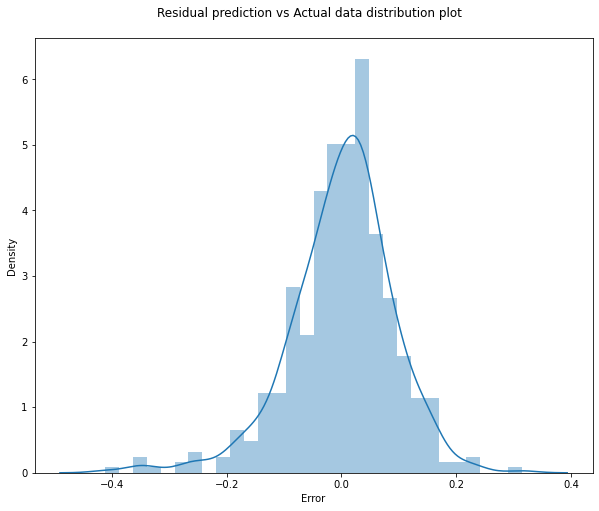

In [78]:
# Plotting a histogram of the error terms
res = y_train - y_train_pred

plt.figure(figsize = (10, 8))
sns.distplot(res)
plt.title('Residual prediction vs Actual data distribution plot  \n')
plt.xlabel('Error')
plt.show()

#### Here we can notice that the error terms are normally distributed and its centered about 0.
#### here model satisfied the assumption of Normal Distribution of Error Terms

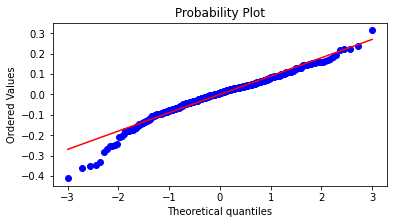

In [79]:
# plotting prob plot and QQ plot

fig, ax = plt.subplots(figsize=(6,3))
_, (__, ___, r) = sp.stats.probplot(res, plot=ax, fit=True)

plt.show()

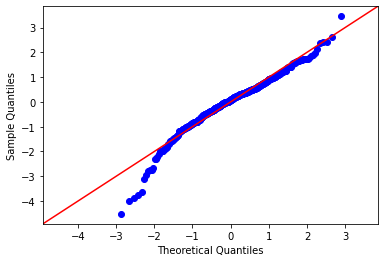

In [80]:
# plotting qq plot

sm.qqplot(res, fit=True, line='45')
plt.show()

#### Inference
- Here we can notice that the error terms are normally distributed.
- here model satisfied the assumption of Normal Distribution of Error Terms

#### 2.Homoscedasticity
- verifying 2nd assumptions the variance of residual is the same for any value of x
- or Error Terms are Independent.

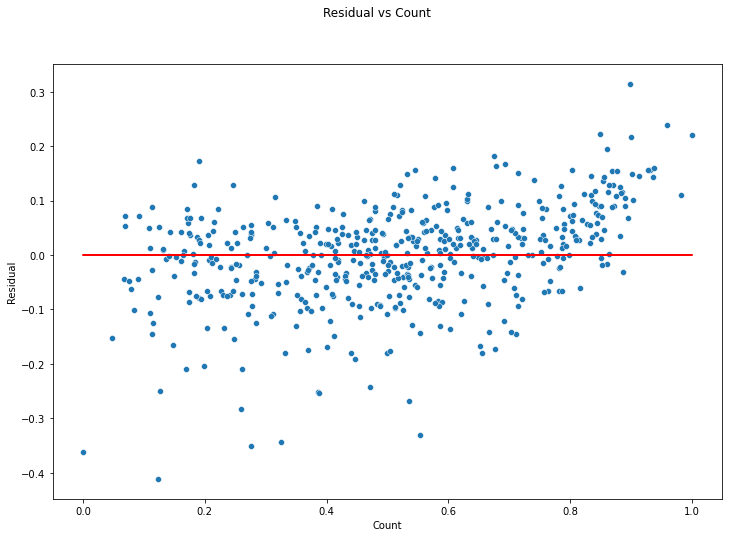

In [81]:
# plotting scatter plot residual vs count 
plt.figure(figsize = (12,8))
sns.scatterplot(y_train, res)
plt.plot(y_train, [0]*len(y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.suptitle('Residual vs Count')
plt.show()

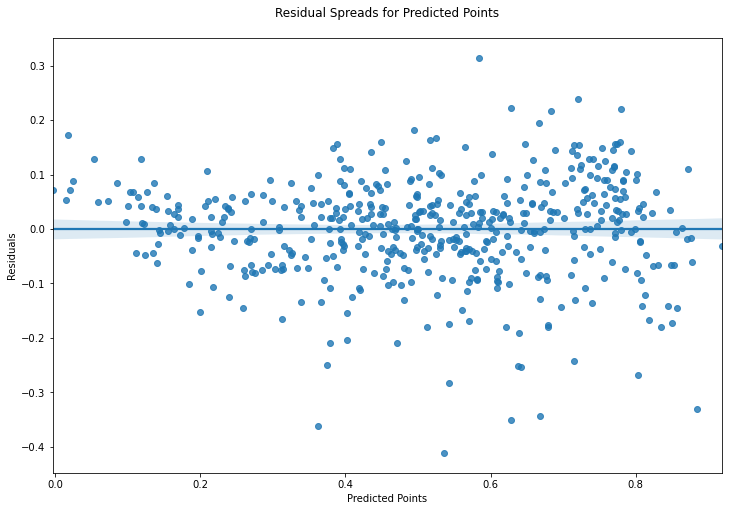

In [82]:
# Checking patterns in residuals spreads for predicted points.
plt.figure(figsize = (12,8))

sns.regplot(y_train_pred, res)
plt.title('Residual Spreads for Predicted Points\n')
plt.xlabel('Predicted Points')
plt.ylabel('Residuals')
plt.show()

#### Inference :
- Here it can be obeserve from both the scatter plot that a constant deviation from the zero line and hence we can conclude our - assumption of Homoscandasticity valid and true.

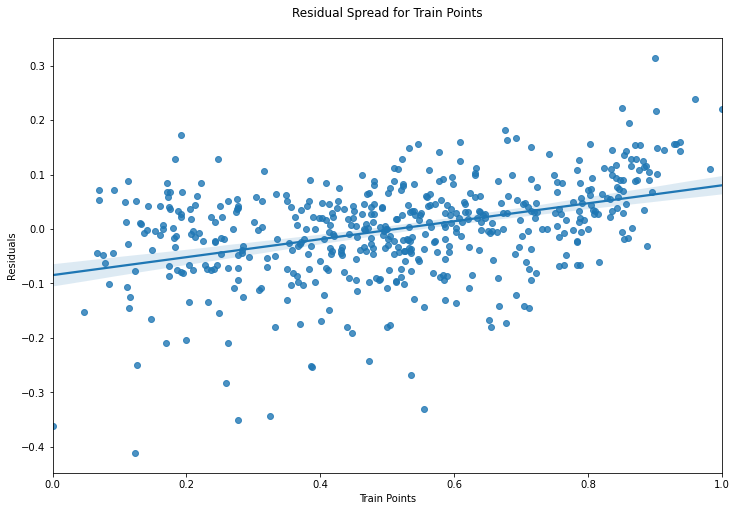

In [83]:
# checking patterns in residuals for Train Points
plt.figure(figsize = (12,8))
sns.regplot(y_train, res)
plt.title('Residual Spread for Train Points\n')
plt.xlabel('Train Points')
plt.ylabel('Residuals')
plt.show()

####  Inference
- No pattern identified in the above plot, so we can conclude that our second assumption of Homoscedasticity is verified.
3.Auto-correlation assumtion

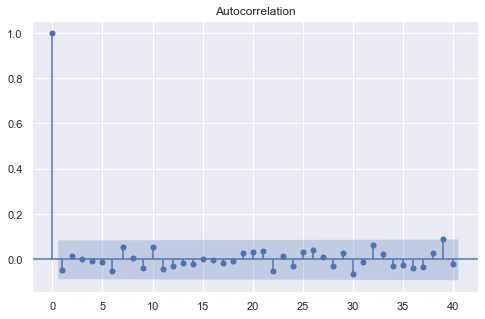

In [84]:
sns.set(rc={'figure.figsize':(8,5)})
acf = smt.graphics.plot_acf(res, lags=40 , alpha=0.05)
acf.show()

#### Inference :
- there are no much error components crossing the confidence interval(greyed out area) and hence we can say that there is no pattern in the error.
- we can say that No auto-correlation presence. means error term of one observation is not influenced by the error term of another observation
- hence third assumption of auto correlation has been preserved

### Step 5 : Making Predictions
### Predictions and Evaluation of the test set

In [85]:
# creating a list of numeric variables

num_vars = ['temp', 'humidity', 'windspeed', 'count']

# Fit it on the data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
184,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0.831783,0.657364,0.115794,0.692706
535,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0.901354,0.610133,0.211364,0.712034
299,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0.511964,0.837699,0.459509,0.303382
221,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0.881625,0.437098,0.466884,0.547400
152,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0.817246,0.314298,0.738905,0.569029


In [86]:
# validating the data to check scalling perfect or not
df_test.describe()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,...,spring,summer,winter,year,holiday,workingday,temp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,...,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,0.638221,0.429795,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,...,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,0.148694,0.216662,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.261915,-0.058858,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.529197,0.273395,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.625590,0.412652,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,0.743798,0.553709,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,1.002146,1.000000,0.963300


#### Dividing it in to X_test and y_test

In [87]:
# Dividing the testing dataset into features and target variable
y_test = df_test.pop('count')
X_test = df_test

In [88]:
X_train_ver6.columns

Index(['Sep', 'Sat', 'Light Snow', 'Mist + Cloudy', 'summer', 'winter', 'year',
       'workingday', 'temp', 'windspeed'],
      dtype='object')

In [89]:
X_test_new = X_test[X_train_ver6.columns]
X_test_new = sm.add_constant(X_test_new)
X_test_new.head()

,const,Sep,Sat,Light Snow,Mist + Cloudy,summer,winter,year,workingday,temp,windspeed
184,1.0,0,0,0,1,0,0,0,0,0.831783,0.115794
535,1.0,0,0,0,0,1,0,1,1,0.901354,0.211364
299,1.0,0,0,0,1,0,1,0,1,0.511964,0.459509
221,1.0,0,0,0,0,0,0,0,1,0.881625,0.466884
152,1.0,0,0,0,0,1,0,0,1,0.817246,0.738905


In [90]:
# Prediction for testing data
y_test_pred = lm_ver6.predict(X_test_new)

### tep 6 : Model Evaluation
### Model Evaluation for the Test set

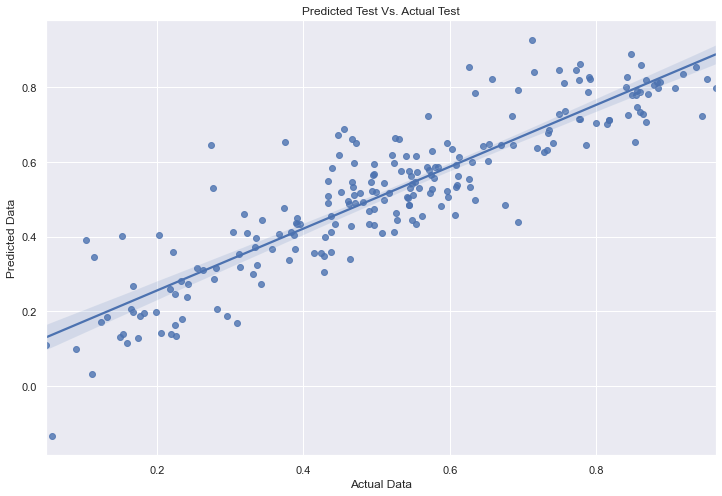

In [91]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize = (12,8))
sns.regplot(y_test, y_test_pred)
plt.title('Predicted Test Vs. Actual Test')
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.show()

#### Inference : -
- We can conclude from the above plot that Actual and Predicted test points are linear.
- As Actual and Predicted test points are linear Means the model works fine.

In [92]:
# Model Evaluation
#importing library for MSE and R square
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [93]:
# getting mean square errorvalue
np.sqrt(mean_squared_error(y_true = y_test, y_pred = y_test_pred))

0.09874521216481717

In [94]:
#calculating R squared value for test data
r2_score(y_test, y_test_pred)

0.7960731181999193

In [96]:
# Adjusted R^2
# Adj. R^2 = 1-(1-R^2)*(n-1)/(n-p-1))

# where, n = sample size , p = number of independent variables

adj_r2 = 1-((1-0.7960731181999193)*(220-1)/(220-10-1))
print(adj_r2)

0.7863158511281452


#### Inference :
- The difference between R squarred of train and test data is less than 5. Hence our model is perfect.

In [97]:
# significant features from final model which predict demands
round(lm_ver6.params,4)

const            0.0751
Sep              0.0975
Sat              0.0668
Light Snow      -0.2865
Mist + Cloudy   -0.0797
summer           0.0890
winter           0.1309
year             0.2331
workingday       0.0561
temp             0.5503
windspeed       -0.1145
dtype: float64

### Equation for best fitted line
### count = 0.0975 x Sep + 0.0668 x Sat - 0.2865 x Light Snow - 0.0797 x (Mist + Cloudy) + 0.0890 x summer + 0.1309 x winter + 0.2331 x year + 0.561 x workingday + 0.5503 x temp - 0.1145 x windspeed + 0.0751

### Summary and Suggestions:
- according to the final model (model 7) R-Squared and Adj. R-Squared value on both the train dataset and test dataset, it - - conclude that the above variables will be definitely explain more than 80% of BoomBikes demand.
- Coefficients of the variables (coef value ) explains factor effecting the BoomBikes demand.
- Based on final model (model 7) top three features contributing significantly towards explaining the demand are:
1. temp (0.5503)
2. Weather Situation : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (-0.3543)
3. Year (0.2331) #### So it can be suggest that BoomBikes Company should give more priority on the above 3 attributes as these have major impact on the Bikes demand.